In [1]:
import importlib
import numpy as np
from proj1_helpers import *
from least_squares import *
from ridge_regression import *
from gradient_descent import *
from logistic_regression import *
import matplotlib.pyplot as plt

In [2]:
y, txorg, ids = load_csv_data('Data/train.csv')
y = np.array([y])
y = y.T
txTestorg, idsTest = load_csv_Test('Data/test.csv')

In [18]:
degree = 3
polFunc = np.ones([txTestorg.shape[0],txTestorg.shape[1]*(degree)+1])
for j in range(degree):
    #trying with mean now
    polFunc[:,1+30*j:1+30*j+30] = np.power(txTestorg,j+1)
txTest = polFunc

In [20]:

#polFunc = np.ones([tx.shape[0],tx.shape[1]*(degree+1)])
# for j in range(degree):
#     polFunc[i,j] = np.power(tx,)

print(y.shape)
print(tx.shape)
print(testW.shape)

(250000, 1)
(250000, 91)
(91, 1)


In [13]:
import testlog as ts
importlib.reload(ts)
l = np.zeros((30,1))
print(y.shape)
print(tx.shape)
print(l.shape)
testW, loss = ts.logistic_regression_test(y, tx, l, 5000, 0.000001)
e = y- tx @ testW
mse =  1/(2*len(y))*e.T@e
print(mse)




(250000, 1)
(250000, 91)
(30, 1)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 30 is different from 91)

0.0014873521072935117
0.3890240891603785


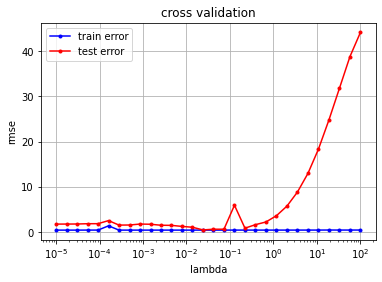

In [20]:
w_init = least_squares(y,tx)[1]
#gradient descent -15 to -6.5 gives good overview
#logistic gradeint diverges after around -14 graph until 13.8 gives good overview -14 good with rmse
lambdas = np.logspace(-5, 2, 30)
rmse_te = []
rmse_tr = []
min_loss = 100000000000000000
min_lambda = 0
for lambda_ in lambdas:
    k_indices = build_k_indices(y,2,1)
    tr = []
    te = []
    
    for k in range(len(k_indices)):

        

        #make a mask to extract all test data
        mask = np.zeros(tx.shape[0], dtype=bool)
        mask[k_indices[k]] = True

        train_x = tx[mask,...]
        train_y = y[mask]
        amask = np.invert(mask)
        test_x = tx[amask,...]
        test_y = y[amask]
        mse, weights = ridge_regression(train_y,train_x,lambda_)

        # calculate the loss for train and test data:
        """rmse loss"""
        loss_tr = np.sqrt(2 * compute_mse(train_y, train_x , weights))
        loss_te = np.sqrt(2 * compute_mse(test_y, test_x , weights))
       
        """logistic loss"""
        
        # loss_tr = compute_loss(train_y, train_x, weights)
        # loss_te = compute_loss(test_y, test_x, weights)
        
        tr.append(loss_tr)
        te.append(loss_te)

    rmse_tr.append(np.array(tr).mean())
    rmse_te.append(np.array(te).mean())
   
    if(rmse_tr[-1]<min_loss):
        min_loss = rmse_tr[-1]
        min_lambda = lambda_

cross_validation_visualization(lambdas, rmse_tr, rmse_te)
print(min_lambda)
print(min_loss)


In [33]:
degree = 5
polFunc = np.ones([txorg.shape[0],txorg.shape[1]*(degree)+1])
for j in range(degree):
    #trying with mean now
    polFunc[:,1+30*j:1+30*j+30] = np.power(txorg,j+1)
tx = polFunc

3.856620421163456e+27
0.520280109077151


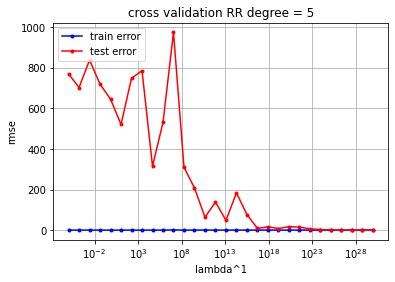

In [35]:
w_init = least_squares(y,tx)[1]
w_init = np.zeros(w_init.shape)
#w_init = np.zeros(w_init.shape)
#gradient descent -15 to -6.5 gives good overview gamma = 3.727593720314938e-07 with degree 5
#logistic gradeint diverges after around -14 graph until 13.8 gives good overview -14 good with rmse
lambdas = np.logspace(-5, 30,30)
rmse_te = []
rmse_tr = []
min_loss1 = 100000000000000000
min_lambda = 0
for lambda_ in lambdas:
    k_indices = build_k_indices(y,4,19)
    tr = []
    te = []
    
    for k in range(len(k_indices)):

        

        #make a mask to extract all test data
        mask = np.zeros(tx.shape[0], dtype=bool)
        mask[k_indices[k]] = True

        train_x = tx[mask,...]
        train_y = y[mask]
        
        amask = np.invert(mask)
        test_x = tx[amask,...]
        test_y = y[amask]
        mse, weights = ridge_regression(train_y,train_x,lambda_)

        # calculate the loss for train and test data:
        """rmse loss"""
        loss_tr = np.sqrt(2 * compute_mse(train_y, train_x , weights))
        loss_te = np.sqrt(2 * compute_mse(test_y, test_x , weights))
       
        """logistic loss"""
        
        # loss_tr = calculate_loss(train_y, train_x, weights)
        # loss_te = calculate_loss(test_y, test_x, weights)
        """predictive loss"""
        # e = train_y - predict_labels(weights,train_x)
        # loss_tr = len(np.where(e == 0)[0])/len(e)
        
        # e1 = test_y - predict_labels(weights,test_x)
        # loss_tr = len(np.where(e1 == 0)[0])/len(e1)
        
        tr.append(loss_tr)
        te.append(loss_te)

    rmse_tr.append(np.array(tr).mean())
    rmse_te.append(np.array(te).mean())
    
    
    if(rmse_te[-1]<min_loss1):
        min_lambda = lambda_
        min_loss1 = rmse_te[-1]
    
        
degreeStr = str(1)
cross_validation_visualization(lambdas, rmse_tr, rmse_te, 'RR degree = %s' % degree,degreeStr)
print(min_lambda)
print(min_loss1)

In [24]:

mse, testW  = least_squares(y,tx)

print(mse)
print(compute_mse(y,tx,testW))

0.0742002114754534
[[0.07420021]]


In [21]:
print(np.where(y==0))



(array([     1,      2,      3, ..., 249996, 249998, 249999], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))


In [19]:


l = np.zeros(testW1.shape)

test = tx.T @ y


mse, testW = gradient_descent(y, tx, l, 50, pow(1e-07,degree))
print(mse)

[[0.11204813]]


In [ ]:
l = np.zeros((30,1))
print(y.shape)
print(tx.shape)
print(l.shape)
mse, testW = logistic_regression(y, tx, l, 500, pow(10,-30))
print(mse)

In [ ]:

l = np.ones((30,1))*0.5
print(y.shape)
print(tx.shape)
print(l.shape)
mse, testW = penalized_logistic_regression(y, meanTX, 0.1, l, 50, 0.000000000001)
print(mse)

In [21]:
w_init = np.zeros((30,1))

testW = logistic_regression(y,tx,w_init,500, pow(10,-11.5))[1]


In [153]:
mse, testW = ridge_regression(y,tx,0.11)
print(mse)
yPred = predict_labels(testW, txTest)
yPred[np.where(yPred==0)] = -1

create_csv_submission(idsTest, yPred, "testSub.csv")

[[0.08068415]]


In [54]:
mse, testW1  = least_squares(y,tx)

LinAlgError: Singular matrix

In [19]:
yPred = predict_labels(testW, txTest)
yPred[np.where(yPred==0)] = -1
print(yPred)
create_csv_submission(idsTest, yPred, "testSub1.csv")

[[-1.]
 [-1.]
 [-1.]
 ...
 [ 1.]
 [-1.]
 [-1.]]


In [30]:
check =yPred+yPred1
print(np.count_nonzero(check==0))
len(check)

117810


568238